# 7 CB Unsupervised Machine Learning

### This script contains the following points
#### 01 Import Libraries
#### 02 Import Data
#### 03 First Look at Data
#### 04 Prepare the Data
#### 05 The Elbow Technique
#### 06 k-Means Clustering
#### 07 Descriptive Statistics

# 01 Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

# 02 Import Data

In [2]:
# Set a path

path = r'C:\Users\Tina\Desktop\CareerFoundry\Data Analytics Immersion\Chocolate Bar Rating'

In [3]:
# Import "checked_chocolate_bars"

choco_check = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'checked_chocolate_bars.csv'))

# 03 First Look at Data

In [4]:
# Shape of "choco_check"

choco_check.shape

(1722, 10)

In [5]:
# First few rows of "choco_check"

choco_check.head()

,Unnamed: 0,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [6]:
# Drop "Unnamed: 0" column

choco_check = choco_check.drop(columns =['Unnamed: 0'])

In [7]:
choco_check.head()

,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


# 04 Prepare the Data

In [8]:
choco_prep = choco_check[['cocoa_percent', 'rating']]

In [9]:
choco_prep.head()

,cocoa_percent,rating
0,63.0,3.75
1,70.0,2.75
2,70.0,3.00
3,70.0,3.50
4,70.0,3.50


# 05 The Elbow Technique

In [10]:
# Define the range of potential clusters in the data

cluster_n = range(1, 10)

In [11]:
# Define k-means clusters in the "cluster_n" range

kmeans = [KMeans(n_clusters = i) for i in cluster_n]

In [12]:
# Create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(choco_prep).score(choco_prep) for i in range(len(kmeans))]

C:\Users\Tina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [13]:
score

[-64832.53644018584,
 -32670.166909337982,
 -17551.56208832148,
 -10087.239567542672,
 -6680.839733199826,
 -4456.462125436099,
 -3142.5133089425544,
 -2354.959544809431,
 -1755.9512976302926]

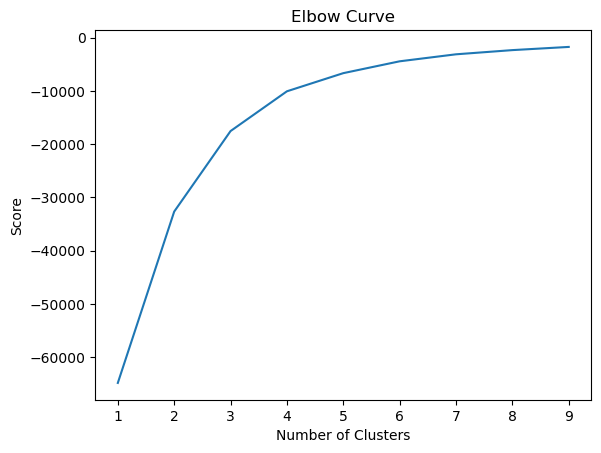

In [14]:
# Plot the elbow curve

pl.plot(cluster_n,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The right amount of clusters for this data set seems to be 4. The curve isn't as sharp as in the example of the exercise but it is still visible that the curve flattens out slowly after the number 4.

# 06 k-Means Clustering

In [10]:
# Create the k-means object

kmeans_o = KMeans(n_clusters = 4) 

In [11]:
# Fit the k-means object to the data

kmeans_o.fit(choco_prep)

C:\Users\Tina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [12]:
# Create a new column for the cluster number

choco_prep['clusters'] = kmeans_o.fit_predict(choco_prep)

C:\Users\Tina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Tina\AppData\Local\Temp\ipykernel_14356\942539883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choco_prep['clusters'] = kmeans_o.fit_predict(choco_prep)


In [13]:
choco_prep.head()

,cocoa_percent,rating,clusters
0,63.0,3.75,0
1,70.0,2.75,3
2,70.0,3.00,3
3,70.0,3.50,3
4,70.0,3.50,3


In [14]:
choco_prep['clusters'].value_counts()

clusters
3    989
1    431
0    221
2     81
Name: count, dtype: int64

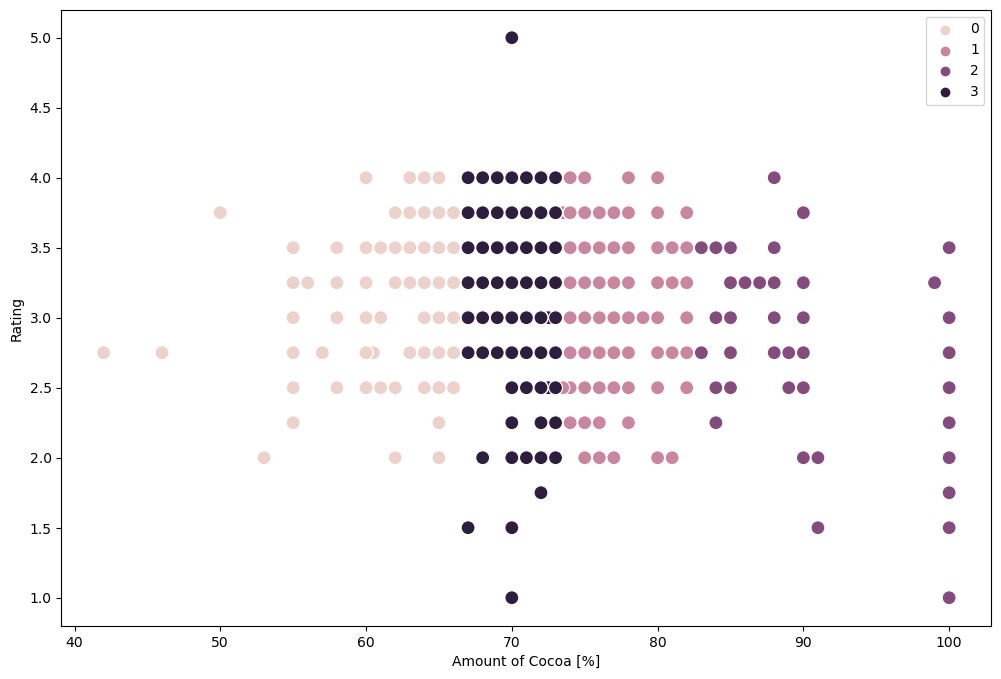

In [16]:
# Plot the clusters for the "cocoa_percent" and "rating" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = choco_prep['cocoa_percent'], y = choco_prep['rating'], hue = kmeans_o.labels_, s = 100)

ax.grid(False)
plt.xlabel('Amount of Cocoa [%]')
plt.ylabel('Rating')
plt.show()

The data is sorted into different clusters based on the amount of cocoa in a chocolate bar. There are clear lines separating the clusters from each other.

But it doesn't give any new insights into the data as these clusters just categorize the data according to their cocoa content but there are no new insights about the relationship between cocoa content and rating.

# 07 Descriptive Statistics

In [21]:
# Rename clusters after colour

choco_prep.loc[choco_prep['clusters'] == 0, 'cluster'] = 'light pink'
choco_prep.loc[choco_prep['clusters'] == 1, 'cluster'] = 'dark pink'
choco_prep.loc[choco_prep['clusters'] == 2, 'cluster'] = 'purple'
choco_prep.loc[choco_prep['clusters'] == 3, 'cluster'] = 'black'

C:\Users\Tina\AppData\Local\Temp\ipykernel_6628\3952493108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choco_prep.loc[choco_prep['clusters'] == 0, 'cluster'] = 'light pink'


In [22]:
# Calculate descriptive statistics

choco_prep.groupby('cluster').agg({'cocoa_percent':['mean', 'median'], 
                         'rating':['mean', 'median']})

cocoa_percent           rating       
                    mean median      mean median
cluster                                         
black          62.477376   64.0  3.151584   3.25
dark pink      70.342770   70.0  3.257583   3.25
light pink     89.246914   85.0  2.864198   3.00
purple         76.313225   75.0  3.138631   3.00

Since the clusters are more like categories of different amounts of cocoa in chocolate bars, this is reflected in the means and medians of the "cocoa_percent" which are increasing for each cluster.

The means of the ratings are roughly around 3-3.25, which means that although there are ratings from 1 to 5, the average rating for a chocolate bar is somewhere slightly above the middle.

##### What could these results be useful for in future steps of an analytics pipeline?

These results show that there are no specific relationships between the cocoa content and the rating of a chocolate bar. This means that to gain insights into this data the focus should be shifted to something else like the ratings of chocolate bars based on the country the beans are from or the country the chocolate bar was made in and see if any patterns can be found there. Or if any specific manufacturer produces more high rated chocolate bars compared to the other manufacturers.